In [1]:
from keras.datasets import imdb
from keras import preprocessing

Using TensorFlow backend.


In [2]:
#特徴量として考慮する単語の数
max_features = 10000

#max_features個の最も出現頻度の高い単語のうち、
#この数の単語を残してテキストをカット
max_len = 20

In [3]:
#データを整数のリストとして読み込み
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
word_index = imdb.get_word_index()

In [6]:
word_index

{'magician': 6558,
 'shallot': 60670,
 'hunchul': 66154,
 'polish': 6710,
 'obedience': 33298,
 'execute': 12208,
 'dodgy': 8840,
 'tae': 40583,
 'spotted': 8475,
 'happpeniiiinngggg': 54009,
 "weissberg's": 87712,
 "sands's": 67838,
 'orchids': 25856,
 'nahhh': 53256,
 'scen': 70687,
 "schmid's": 29823,
 'snaky': 52875,
 'denton': 30734,
 'because': 85,
 'nordham': 57089,
 'sequelae': 54136,
 'loathe': 14650,
 "gr's": 85529,
 'polymer': 44051,
 'johanson': 30242,
 'diversifying': 47501,
 'augmenting': 68795,
 'garbage': 1241,
 'diarrhoea': 85246,
 'caricaturing': 59156,
 'decorators': 63575,
 'sympathizes': 67402,
 'devilment': 65286,
 "rudolph's": 35434,
 'baranov': 85028,
 'shonuff': 56675,
 'superpowers': 11466,
 'deposed': 30976,
 'outbreaking': 65235,
 'abut': 33928,
 'methinks': 86100,
 'gossips': 48716,
 'stylized': 6451,
 'hohenzollern': 79044,
 'madcap': 23200,
 'hessman': 43956,
 "peg's": 54422,
 'sawasdee': 74531,
 'snobbishness': 36365,
 'momma': 21082,
 'gnashingly': 7359

In [7]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [8]:
padding = reverse_word_index.get(0)
sequence_beginning =  reverse_word_index.get(1)
enigma = reverse_word_index.get(2)

In [9]:
padding

In [10]:
sequence_beginning

'the'

In [11]:
enigma

'and'

In [12]:
# `i-3`となっているのは0, 1, 2がそれぞれ「パディング」「シーケンス開始」「不明」のインデックスとして予約されているため
decord_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])

print(decord_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

<h2>6.3 rnnの高度な

In [13]:
import os

In [14]:
data_dir = '/Users/fgklo/jupyter_work/pracitce/python_and_keras_collet_practice/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

In [15]:
f = open(fname)

In [16]:
data = f.read()

In [17]:
f.close()

In [18]:
lines = data.split('\n')

In [19]:
header = lines[0].split(',')

In [20]:
lines = lines[1:]

In [21]:
print(header)

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']


In [22]:
import numpy as np

In [23]:
float_data = np.zeros((len(lines), len(header)-1))

In [24]:
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [25]:
print(float_data[0])

[ 9.96520e+02 -8.02000e+00  2.65400e+02 -8.90000e+00  9.33000e+01
  3.33000e+00  3.11000e+00  2.20000e-01  1.94000e+00  3.12000e+00
  1.30775e+03  1.03000e+00  1.75000e+00  1.52300e+02]


In [26]:
from matplotlib import pyplot as plt

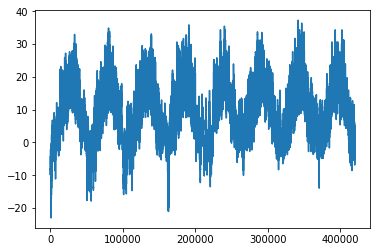

In [27]:
temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)
plt.show()

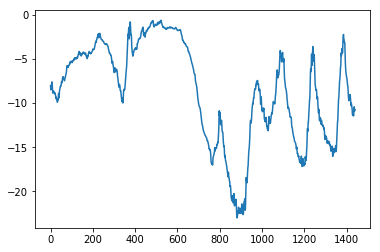

In [28]:
plt.plot(range(1440), temp[:1440])
plt.show()

In [29]:
#200000行目までのデータで平均と標準偏差を出していることに注意
mean = float_data[:200000].mean(axis=0)
float_data -= mean

In [30]:
std = float_data[:200000].std(axis=0)
float_data /= std

In [31]:
float_data.shape

(420551, 14)

In [32]:
#これで最後の次元のshapeを取得する
float_data.shape[-1]

14

In [33]:
array3 = np.zeros((3,))

In [34]:
array3

array([0., 0., 0.])

In [35]:
array3dash = np.zeros((3))

In [36]:
array3dash

array([0., 0., 0.])

In [37]:
array3dash2 = np.zeros(3)

In [38]:
array3dash2

array([0., 0., 0.])

In [39]:
def generator(data, lookback, delay, min_index, max_index,
             shuffle=False, batch_size=128, step=6):
    if max_index is None:
        #テスト:420551-144-1=420406
        max_index = len(data) -delay -1
    
    #訓練:i=0+1440
    #検証:i=200001+1440=201441
    #テスト:i=300001+1440=301441
    i = min_index + lookback
    
    while 1:
        if shuffle:
            #訓練:1440,200000,128
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        
        else:
            #検証:201441+128 >= 300000 → False
            #テスト:301441+128 >= 420406 → false
            if i + batch_size >= max_index:
                i = min_index + lookback
                
            #検証:[201441,201441+128) の区間の1の等差数列,128の要素
            #テスト:[301441,301441+128) の区間の1の等差数列,128の要素
            rows = np.arange(i, min(i+batch_size, max_index))
            
            #i=201441+128=201569
            #i=301441+128=301569
            i += len(rows)
            
        #訓練・検証・テスト:(128,1440/6=240,14) 
        samples = np.zeros((len(rows), lookback//step, data.shape[-1]))
        
        #訓練・検証・テスト:(128,)
        targets = np.zeros((len(rows),))
        
        #128回回る
        for j,row in enumerate(rows):
            #240個の点が入る
            #訓練: range(あるランダムな点(1440~200000)のidx-1440, ランダムな点のidx, 6) → [ idx-1440,idx-1434,...,idx] 
            #検証: range(点[201441~201568]-1440, idx, 6) → [ idx-1440,idx-1434,...,idx] → [200001, 200007,...]
            #テスト: range(点[301441~301568]-1440, idx, 6) → [ idx-1440,idx-1434,...,idx] → [300001,300007,... ] 
            indices = range(rows[j] - lookback, rows[j], step)
            
            #samples[j]には240点（過去10日分の(1440)1時間おき(step=6)のデータ）のデータが入る
            #訓練: ある点の-1440から6刻み分のdataがsamples[j]に入る
            #検証: 点[200001~200128]のidxのdataがsamples[j]に入る
            #テスト:点[300001~300128]のidxのdataがsamples[j]に入る
            samples[j] = data[indices]
            
            #訓練: あるランダム点+144のdata[1](摂氏データ)がtargets[j]に入る
            #検証: 点[200001~200128]のidx+144のdata[1]がtargets[j]に入る
            #テスト:点[300001~300128]のidx+144のdata[1]がtargets[j]に入る
            targets[j] = data[rows[j] + delay][1]
            
        yield samples, targets

In [40]:
#10日
lookback = 1440
#1時間
step = 6
#1日
delay = 144
batch_size = 128

#訓練ジェネレータ
train_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=0,
                     max_index=200000,
                     shuffle=True,
                     step=step,
                     batch_size=batch_size)
#検証ジェネレータ
val_gen = generator(float_data,
                   lookback=lookback,
                   delay=delay,
                   min_index=200001,
                   max_index=300000,
                   step=step,
                   batch_size=batch_size)
#テストジェネレータ
test_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=300001,
                    max_index=None,
                    step=step,
                    batch_size=batch_size)

In [43]:
#検証データセット全体を調べるためにval_genから抽出する時間刻みの数
#98559//128=769
val_steps = (300000 - 200001 - lookback) // batch_size

#テストデータセット全体を調べるためにtest_genから抽出する時間刻みの数
#(420551-300001-1440)//128 = 930
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [44]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        #これで128点のバッチを一個ずつ回していく？原理は理解できてない
        samples, targets = next(val_gen)
        #samplesは(128,240,14)。意味は(バッチはある時点から10分おきで128回分、その点から-1440からの、6ごとのstepの値、14個の特徴量)
        preds = samples[:, -1, 1]
        
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)

    print(np.mean(batch_maes))

In [45]:
evaluate_naive_method()

0.2897359729905486


In [46]:
#摂氏の誤差に変換
celsius_mae = 0.29 * std[1]

In [47]:
celsius_mae

2.5672247338393395

In [48]:
#全結合モデル
from keras.models import Sequential
from keras import layers
#root mean square propagation
from keras.optimizers import RMSprop

model = Sequential()

In [49]:
model.add(layers.Flatten(input_shape=(lookback//step,
                                     float_data.shape[-1])))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')

In [50]:
history = model.fit_generator(train_gen,
                             steps_per_epoch=500,
                             epochs=20,
                             validation_data=val_gen,
                             validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 11s 22ms/step - loss: 1.9602 - val_loss: 1.0129
Epoch 2/20
500/500 [==============================] - 9s 18ms/step - loss: 0.7462 - val_loss: 0.4692
Epoch 3/20
500/500 [==============================] - 10s 19ms/step - loss: 0.3515 - val_loss: 0.4117
Epoch 4/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2809 - val_loss: 0.3007
Epoch 5/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2618 - val_loss: 0.3049
Epoch 6/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2526 - val_loss: 0.3108
Epoch 7/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2445 - val_loss: 0.3172
Epoch 8/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2370 - val_loss: 0.3153
Epoch 9/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2327 - val_loss: 0.3944
Epoch 10/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2285 - val